In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)

# Features and target
X = df.drop('species', axis=1)
y = df['species']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)


In [3]:
# Initialize ANN
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=10, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer
model.add(Dense(units=8, activation='relu'))

# Output layer
model.add(Dense(units=3, activation='softmax'))  # 3 classes for Iris


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [5]:
# Train the ANN
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.2, verbose=1)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3051 - loss: 1.1507 - val_accuracy: 0.2381 - val_loss: 1.1430
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3817 - loss: 1.0354 - val_accuracy: 0.3333 - val_loss: 1.0427
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5395 - loss: 0.8531 - val_accuracy: 0.4286 - val_loss: 0.9716
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6723 - loss: 0.8000 - val_accuracy: 0.6667 - val_loss: 0.9105
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7506 - loss: 0.7428 - val_accuracy: 0.7143 - val_loss: 0.8563
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8080 - loss: 0.6143 - val_accuracy: 0.7143 - val_loss: 0.8136
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8117 - loss: 0.6708 - val_accuracy: 0.7619 - val_loss: 0.7750
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8191 - loss: 0.6296 - val_accuracy: 0.7619 - val_loss

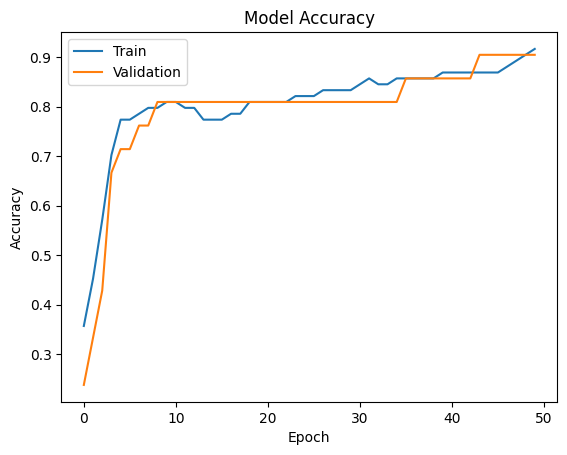

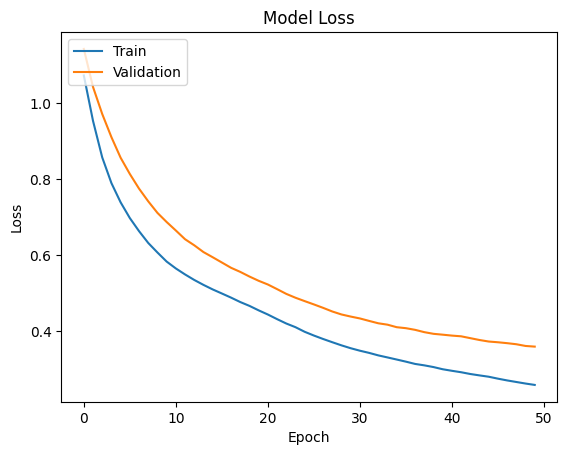

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [7]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8903 - loss: 0.2283
Test Accuracy: 0.87
